In [1]:
import time
import json
import requests
from datetime import datetime
import pandas as pd
import numpy as np
def catch_data():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    reponse = requests.get(url=url).json()
    #返回数据字典
    data = json.loads(reponse['data'])
    return data
data = catch_data()
data.keys()
lastUpdateTime = data['lastUpdateTime']
chinaTotal = data['chinaTotal']
chinaAdd = data['chinaAdd']
print(chinaTotal)
print(chinaAdd)

{'confirm': 84565, 'heal': 79802, 'dead': 4645, 'nowConfirm': 118, 'suspect': 5, 'nowSevere': 3, 'importedCase': 1738, 'noInfect': 396}
{'confirm': 18, 'heal': 11, 'dead': 0, 'nowConfirm': 7, 'suspect': 0, 'nowSevere': -1, 'importedCase': 4, 'noInfect': 4}


In [2]:
from pyecharts.charts import Pie
import pyecharts.options as opts
(
    Pie(init_opts=opts.InitOpts(width='720px',height='320px'))#默认900，600
    .add(series_name='', data_pair=[list(z) for z in zip(chinaTotal.keys(), chinaTotal.values())])#饼图
 
).render_notebook()


In [3]:
import time
import json
import requests
from datetime import datetime
import pandas as pd
import numpy as np
def catch_data():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    reponse = requests.get(url=url).json()
    #返回数据字典
    data = json.loads(reponse['data'])
    return data
data = catch_data()
data.keys()
lastUpdateTime = data['lastUpdateTime']
# 数据明细，数据结构比较复杂，一步一步打印出来看，先明白数据结构
areaTree = data['areaTree']
# 国内数据
china_data = areaTree[0]['children']
china_list = []
for a in range(len(china_data)):
    province = china_data[a]['name']
    province_list = china_data[a]['children']
    for b in range(len(province_list)):
        city = province_list[b]['name']
        total = province_list[b]['total']
        today = province_list[b]['today']
        china_dict = {}
        china_dict['province'] = province
        china_dict['city'] = city
        china_dict['total'] = total
        china_dict['today'] = today
        china_list.append(china_dict)

china_data = pd.DataFrame(china_list)
china_data.head()


,city,province,today,total
0,地区待确认,香港,"{'confirm': 13, 'confirmCuts': 0, 'isUpdated':...","{'nowConfirm': 40, 'confirm': 1079, 'suspect':..."
1,境外输入,内蒙古,"{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...","{'nowConfirm': 25, 'confirm': 155, 'suspect': ..."
2,呼伦贝尔,内蒙古,"{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...","{'nowConfirm': 0, 'confirm': 9, 'suspect': 0, ..."
3,包头,内蒙古,"{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...","{'nowConfirm': 0, 'confirm': 11, 'suspect': 0,..."
4,呼和浩特,内蒙古,"{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ...","{'nowConfirm': 0, 'confirm': 7, 'suspect': 0, ..."


In [4]:
# 定义数据处理函数
def confirm(x):
    confirm = eval(str(x))['confirm']
    return confirm
def dead(x):
    dead = eval(str(x))['dead']
    return dead
def heal(x):
    heal =  eval(str(x))['heal']
    return heal
# 函数映射
china_data['confirm'] = china_data['total'].map(confirm)
china_data['dead'] = china_data['total'].map(dead)
china_data['heal'] = china_data['total'].map(heal)
china_data = china_data[["province","city","confirm","dead","heal"]]
china_data.head()


,province,city,confirm,dead,heal
0,香港,地区待确认,1079,4,1035
1,内蒙古,境外输入,155,0,130
2,内蒙古,呼伦贝尔,9,0,9
3,内蒙古,包头,11,0,11
4,内蒙古,呼和浩特,7,0,7


In [5]:
area_data = china_data.groupby("province")["confirm"].sum().reset_index()
area_data.columns = ["province","confirm"]
print(area_data )

   province  confirm
0        上海      672
1        云南      185
2       内蒙古      232
3        北京      593
4        台湾      442
5        吉林      155
6        四川      564
7        天津      192
8        宁夏       75
9        安徽      991
10       山东      790
11       山西      198
12       广东     1593
13       广西      254
14       新疆       76
15       江苏      653
16       江西      937
17       河北      328
18       河南     1276
19       浙江     1268
20       海南      169
21       湖北    68135
22       湖南     1019
23       澳门       45
24       甘肃      139
25       福建      358
26       西藏        1
27       贵州      147
28       辽宁      149
29       重庆      579
30       陕西      308
31       青海       18
32       香港     1079
33      黑龙江      945


In [6]:
from pyecharts.charts import Map
import pyecharts.options as opts
from pyecharts.globals import ChartType

(
    Map()
    .add("",[list(z) for z in zip(list(area_data["province"]), list(area_data["confirm"]))], "china",is_map_symbol_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="2019_nCoV中国各地区总确诊人数地图"),visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                pieces = [
                    
                        {"min": 1000 , "label": '>1000',"color": "#893448"}, #不指定 max，表示 max 为无限大
                        {"min": 500, "max": 999, "label": '500-999',"color" : "#ff585e" },
                        {"min": 300, "max": 499, "label": '300-499',"color": "#fb8146"},
                        {"min": 100, "max": 299, "label": '100-299',"color": "#ffA500"},
                        {"min": 10, "max": 99, "label": '10-99',"color": "#ffb248"},
                        {"min": 0, "max": 9, "label": '0-9',"color" : "#fff2d1" }]))

).render_notebook()


In [7]:
area_data = china_data.groupby("province")["confirm"].sum().reset_index()
area_data.columns = ["province","confirm"]
area_data.to_csv('china.csv',index=False)


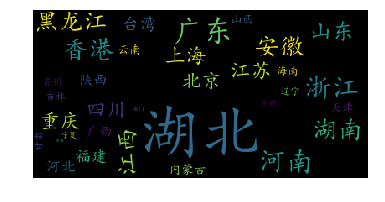

In [16]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
def draw_cloud(read_name):
    # 参数分别是指定字体、背景颜色、
    wc = WordCloud(font_path='simkai.ttf',
                   background_color="black",  # 背景颜色
                   )
    fp = pd.read_csv(read_name, encoding='gbk')
    name = list(fp.province)  # 词
    value = fp.confirm  # 词的频率
    for i in range(len(name)):
        name[i] = str(name[i])
    dic = dict(zip(name, value))  # 词频以字典形式存储
    wc.generate_from_frequencies(dic)  # 根据给定词频生成词云
    plt.imshow(wc)
    plt.axis("off")  # 不显示坐标轴
    plt.show()
    wc.to_file('china.png')  # 图片命名
if __name__ == '__main__':
    draw_cloud("china.csv")

In [8]:
guangdong_data=china_data.loc[china_data.province=='广东',['city','confirm']]
guangdong_data.to_csv('guangdong.csv',index=False)

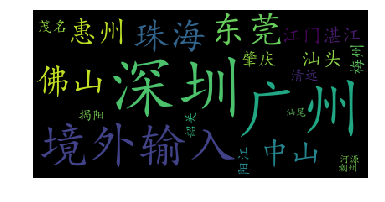

In [12]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
def draw_cloud(read_name):
    # 参数分别是指定字体、背景颜色、
    wc = WordCloud(font_path='simkai.ttf',
                   background_color="black",  # 背景颜色
                   )
    fp = pd.read_csv(read_name, encoding='gbk')
    name = list(fp.city)  # 词
    value = fp.confirm  # 词的频率
    for i in range(len(name)):
        name[i] = str(name[i])
    dic = dict(zip(name, value))  # 词频以字典形式存储
    wc.generate_from_frequencies(dic)  # 根据给定词频生成词云
    plt.imshow(wc)
    plt.axis("off")  # 不显示坐标轴
    plt.show()
    wc.to_file('guangdong.png')  # 图片命名
if __name__ == '__main__':
    draw_cloud("guangdong.csv")